<img style="float: left;" src="PSU_Logo.png" alt="UoE" width="200px"/>
<img style="float: right;" src="UoE_Logo.png" alt="UoE" width="300px"/>

## Week 1 of SVAT Modelling - an Introduction to SimSphere
<img style="float: right;" src="LAI_Logo.png" alt="Land-Atmosphere Interactions" width="60px"/></p>
## SimSphere - A SVAT Model from Penn State
https://simsphere.ems.psu.edu/index.html  
Jupyter notebook for ECSC10014 Land-Atmosphere Interactions  
author: jbm *for* Session 2020-21  [version 0.13, latest 16:30, 27 Sep 2020]
## Background
SimSphere is an example of a soil-vegetation-atmosphere transport (SVAT) model and one we have used for many years in Land-Atmosphere Interactions. We normally use a version that runs on the University's servers - indeed if you look on Learn you'll see the practical schedule and worksheets we normally use. This year because of covid restrictions we have moved to a version that works via the web. SimSphere has been developed over 30 years in Professor Toby Carlson's group in the Meteorology Department at Penn State University and they recently released a FORTRAN version of the software which I've  packaged up into this Jupyter Notebook with routines written in python.  You can read all about SimSphere - its history, design and construction at Prof Carlson's web site - https://simsphere.ems.psu.edu/model.html  
<img style="float: right;" src="structure.png" alt="SimSphere structure" width="300px"/>
What I want you to get out of SimSphere is an appreciation for using simulation models to answer 'what if' questions of the kind we posed in week 1 of the course; if we replace forest with agriculture, what are the impacts on local or regional climate; if we plant trees which in turn reduce soil moisture locally, what impact might this have on boundary-layer development. Toby Carlson's group has a whole handbook posing similar questions which you can have a look at for your own ideas - the workbook is accessible from the 'File' menu above. The Workbook has some some great pointers to experiments you can run with SimSphere - it is nicely written in a conversational (and witty) style.

## Imports
Let's start by importing some libraries to the environment:
- *matplotlib inline* for creating inline plots
- *json* to read data files in json format
- *pandas* to order and sort data in a convenient Table-like format
- *numpy* for numerical routines
- *matplotlib* for plotting data
- *subprocess* so we can run the model written in FORTRAN
- *ipywidgets* for interactivity
- *defins* for python code that just takes up space in the main notebook

In [1]:
#%matplotlib inline
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import subprocess
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import HBox, Label

# set some options to begin with here
outputvariables=['SWF','NETRAD','SENS','LE','GRF','T50','T10','TFOL','TRAD',
                 'W50','W10','WFOL','SH50','SH10','SHFOL','BOW','SMA','RZMA',
                 'STMR','VPDEF','LWPOT','EWPOT','GWPOT','CO2F','CO2CAN','WATEFF',
                 'O3CAN','GBLO3','O3F','PBLZ']
lookup = 'TIME    SWF   NETRAD'   # the first line with column names
eb_colours = [ 'yellow', 'red', 'green', 'blue', 'black']
eb_labels = ['Shortwave in','Net radiation','Sensible heat flux','Latent heat flux','Ground heat flux']
cat_opts = widgets.RadioButtons(
    options=['soil', 'vegetation', 'meteorological'],
    # value='vegetation',
    description='Category:',
    disabled=False
)
soil_opts = widgets.Dropdown(           # model codes
    options=["soil albedo",             # albg
             "soil moisture",           # f
             "root zone moisture",      # fsub
             "thermal inertia"],        # ti_a
    value="soil moisture",
    description='Soil:',
    disabled=True,
)
veg_opts = widgets.Dropdown(
    options=["fraction covered by vegn", # frveg
             "vegetation albedo",        # albf
             "leaf area index"],         # xlai
    value="leaf area index",
    description='Vegetation:',
    disabled=True,
)
atm_opts = widgets.Dropdown(
    options=["roughness length",         # zo
             "cloud fraction"],          # cld_fract
    value="roughness length",
    description='Atmosphere:',
    disabled=True,
)
soil_list=['Soil','albg','f','fsub','ti_a']
veg_list=['Vegetation','frveg','albf','xlai']
atm_list=['Meteorological','zo','cld_fract']

## Step 1: Get familiar with the model

In [2]:
# First time the model is run, bring in the default input data.
# Edit this file in your workspace - DO NOT edit the original file.
with open('data/default/i_model.json') as json_file:
    data = json.load(json_file)
# and put a copy in the current working directory as a copy which can then be edited
with open('i_model.json', 'w') as outfile:
    json.dump(data,outfile)

# Read in the input data so we can modify the parameters
df = pd.read_json('i_model.json')

# Edit the parameter of interest and run the model. Repeat.

ret = subprocess.call(["./simsphere"],shell=True)
print("Run complete")

Run complete


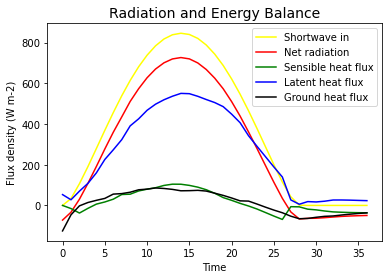

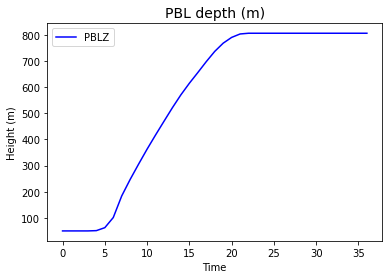

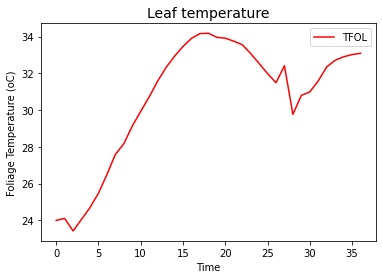

In [3]:
# Find the line number where the output data starts
lookup = 'TIME    SWF   NETRAD'   # the first line with column names
# Data analysis
with open('o_model.dat') as myFile:
    for num, line in enumerate(myFile, 1):
        if lookup in line:
            # print('Output starts at line:', num)
            stl = num

# can now use Pandas to read in data since this part of the output file is a regular array
df2=pd.read_csv('o_model.dat', sep='\s+',skiprows=stl-1, header=0, skip_blank_lines=True)
df2.set_index('TIME')

# build a list of variables, colours and labels to plot
eb_list = [ df2['SWF'], df2['NETRAD'], df2['SENS'], df2['LE'], df2['GRF'] ]

def update():
    ax = plt.gca()
    # Plot the radiation and energy balance terms
    for i in range(len(eb_list)):
        eb_list[i].plot(ax=ax, color=eb_colours[i], label=eb_labels[i])
        ax.legend()  
    ax.set_xlabel('Time')
    ax.set_ylabel('Flux density (W m-2)')
    ax.set_title('Radiation and Energy Balance', fontsize=14, color='black')   
    plt.show()

    # Plot the max planetary boundary layer height reached at a particular time over time
    ax1 = plt.gca()
    df2['PBLZ'].plot(ax=ax1, color='blue')
    ax1.legend()
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Height (m)')
    ax1.set_title('PBL depth (m)', fontsize=14, color='black')   
    plt.show()

    # Plot leaf temperature
    ax2 = plt.gca()
    df2['TFOL'].plot(ax=ax2, color='red')
    ax2.legend()   
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Foliage Temperature (oC)')
    ax2.set_title('Leaf temperature', fontsize=14, color='black')   
    plt.show()
    
update()

### Experiments. 
Now let's change some of the input variables one at a time to see how the PBL depth is affected. This is the same as we did with the Blackadar model last week.  We'll keep it simple this week by specifying a soil type but you are free to alter properties of the soil such as albedo and moisture; and  properties of the vegetation such as albedo, leaf area index and vegetation fraction. You can change meteorological properties such as surface roughness and cloudiness also.

### Inputs to the model. 
You might be asking - what are the input values that could go into the model anyway? Well, run the cell below to see what driving variables are in the model and what upper and lower limits these variables can have in your model.

In [4]:
inputparams_df = pd.read_excel("./Part IV; model input parameters.xlsx", 'input variables', skiprows=1,nrows=51)
#inpars = inputparams_df.to_dict("records")
inputparams_df

,Category,Name,Long Name,default value,data type,Units,lower,upper
0,Meteorological,omega,Atmospheric Precipitable Water,3.13,float,cm,0.05,5
1,Meteorological,zo,Surface Roughness,0.2,float,meters,0.01,2
2,Meteorological,obst_hgt,Obstacle Height,1,float,meters,0.01,2
3,Meteorological,cloud_flag,Cloud Cover,F,char,NaN,"{T,F}",NaN
4,Meteorological,cld_fract,Cloud Cover Fraction,0,int,perdecage?,1,10
5,NaN,nobs_ptq,Number of Humidity Observations,12,int,NaN,3,50
6,NaN,nobs_wind,Number of Wind Observations,11,int,NaN,3,50
7,Soil,f,Surface Moisture,0.5,float,NaN,0,1
8,Soil,fsub,Root Zone Moisture,0.75,float,NaN,0,1
9,Soil,wmax,Substrate Maximum Water,0.34,float,NaN,0,1


 ### What you should do:  
Lets make some simple changes to ONE of the driving input variables and see what happens to fluxes and the mixing layer. I'll leave it to you and your group to decide what to explore - just use the selection boxes below - but just choose *one* thing to change systematically for the moment.  We'll be doing a proper sensitivity experiment starting in week 5 of the course and you'll be exploring all of this in more detail for your intermittent assessment.  

Make some changes to the Soil, Vegetation or Atmosphere via the dropdown boxes below to see how the land-atmosphere system reacts. Use the slider to select a value of one of the driving variables and run the model. repeat this process until you see a pattern emerging and you can explain the results you see.

In [5]:
output=widgets.Output()
display(cat_opts,output)
display(soil_opts,output)
display(veg_opts,output)
display(atm_opts,output)
drv_opts=[soil_opts,veg_opts,atm_opts]

def on_value_change(change):
    with output:
        pass

cat_opts.observe(on_value_change, names='value')
soil_opts.observe(on_value_change, names='value')
veg_opts.observe(on_value_change, names='value')
atm_opts.observe(on_value_change, names='value')


RadioButtons(description='Category:', options=('soil', 'vegetation', 'meteorological'), value='soil')

Output()

Dropdown(description='Soil:', disabled=True, index=1, options=('soil albedo', 'soil moisture', 'root zone mois…

Output()

Dropdown(description='Vegetation:', disabled=True, index=2, options=('fraction covered by vegn', 'vegetation a…

Output()

Dropdown(description='Atmosphere:', disabled=True, options=('roughness length', 'cloud fraction'), value='roug…

Output()

In [6]:
cat_opts.value
cat_opt=cat_opts.options.index(cat_opts.value)

if cat_opt==0:
    soil_opts.disabled=False
    veg_opts.disabled=True
    atm_opts.disabled=True
elif cat_opt==1:
    soil_opts.disabled=True
    veg_opts.disabled=False
    atm_opts.disabled=True
else:
    soil_opts.disabled=True
    veg_opts.disabled=True
    atm_opts.disabled=False
    
#soil_opts.value
# Record index of surface driver selected
soil_opt=soil_opts.options.index(soil_opts.value)
#print(soil_opt)
veg_opts.value
# Record index of surface driver selected
veg_opt=veg_opts.options.index(veg_opts.value)
atm_opts.value
# Record index of surface driver selected
atm_opt=atm_opts.options.index(atm_opts.value)

if cat_opt==0:
    listtouse=soil_list
    opt=soil_opt
elif cat_opt==1:
    listtouse=veg_list
    opt=veg_opt
else:
    listtouse=atm_list
    opt=atm_opt

df_final = inputparams_df.loc[inputparams_df['Category'].eq(listtouse[0]) &
                             inputparams_df['Name'].eq(listtouse[opt+1]), 
                             ['Long Name','default value', 'lower', 'upper']]
print(df_final)
# Build a slider relevant to the option chosen eg leaf, area index, soil moisture etc
# and with default value and lower/upper limits prescribed
#style = {'description_width': 'initial'}
slider = widgets.FloatSlider(
    value=df_final['default value'],
    min=df_final['lower'],
    max=df_final['upper'],
    step=0.1,
    description=str(df_final['Long Name']),
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
    #style=style,
)
#label=str(df_final['Long Name'])
def on_value_change(change):
    pass

slider.observe(on_value_change, names='value')
display(slider)

          Long Name default value lower upper
7  Surface Moisture           0.5     0     1


FloatSlider(value=0.5, continuous_update=False, description='7    Surface Moisture\nName: Long Name, dtype: ob…

0.5
Run complete


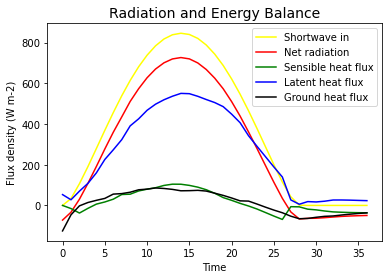

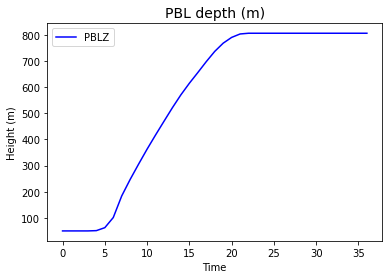

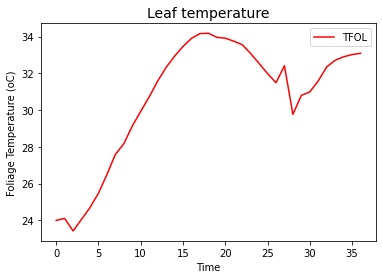

In [7]:
print(slider.value)

# Put the new data into the input file and re-run Simsphere

data['inputs'][cat_opts.options[cat_opt]][listtouse[opt+1]] = slider.value

# put the whole new array back in the i_model.json file so we can re-run the model
with open('i_model.json', 'w') as outfile:
    json.dump(data,outfile)

ret = subprocess.call(["./simsphere"],shell=True)
print("Run complete")
# and display the results

# Append relevant output data to a file for graphing once the test has finished
# can now use Pandas to read in data since this part of the output file is a regular array
df2.iloc[0:0]
df2=pd.read_csv('o_model.dat', sep='\s+',skiprows=stl-1, header=0, skip_blank_lines=True)
df2.set_index('TIME')
update()


## Data printout  
It can be very useful to print out a selection of the model results rather than trying to eye-ball the figures:

In [8]:
df4 = df2[['TIME','SWF','NETRAD','SENS','LE','GRF','T10','TFOL','SMA','STMR','VPDEF','PBLZ']]
df4.head(36)

,TIME,SWF,NETRAD,SENS,LE,GRF,T10,TFOL,SMA,STMR,VPDEF,PBLZ
0,5.5,0.00,-72.07,0.00,53.20,-125.27,24.50,24.00,0.500,0.0,0.00,50.0
1,6.0,33.74,-33.51,-15.37,27.82,-45.96,24.11,24.11,0.501,0.0,0.00,50.0
2,6.5,106.83,30.65,-37.47,70.19,-2.07,24.01,23.43,0.501,139.0,4.32,50.0
3,7.0,190.64,108.34,-14.38,108.37,14.35,24.30,24.06,0.501,85.8,5.38,50.0
4,7.5,279.48,191.34,6.39,159.88,25.07,24.65,24.70,0.501,64.6,6.61,51.1
5,8.0,369.04,277.27,16.94,225.83,34.50,25.33,25.48,0.500,53.9,7.86,62.4
6,8.5,456.19,359.56,30.66,273.27,55.63,26.20,26.49,0.499,47.7,9.00,101.2
7,9.0,538.66,434.84,53.61,323.18,58.05,27.09,27.59,0.497,43.8,10.48,183.9
8,9.5,614.24,511.10,55.21,391.00,64.90,27.73,28.17,0.494,41.2,11.13,247.1
9,10.0,681.45,573.52,71.09,425.52,76.90,28.52,29.13,0.492,39.5,12.31,305.8


## Define your own vegetation. 
We can configure the soil and plant characteristics in more depth - and we may do this later for the intermittent assessment but for now - these are some of the soil and plant physiological parameters which CAN be altered.

In [ ]:
customparams_df = pd.read_excel("./Part IV; model input parameters.xlsx", 'input variables, soils & plants', skiprows=1,nrows=22)
customparams_df

# END